In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
from pathlib import Path
data_path= Path('../SurfsUp/Resources/hawaii.sqlite')
engine = create_engine(f"sqlite:///{data_path}")

In [42]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [44]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
recent_date = session.query(Measurements).filter(Measurements.date).order_by(Measurements.date.desc()).first()
print(recent_date.date)

2017-08-23


In [47]:
year_ago = dt.date(2017,8,23)-dt.timedelta(days = 365)
print(year_ago)

2016-08-23


In [48]:
year_ago_dt = dt.date(2016,8,23)
print(year_ago_dt)

2016-08-23


In [49]:
data = session.query(Measurements.date,Measurements.prcp).filter(Measurements.date>=year_ago_dt).all()
print(data)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [50]:
import pandas as pd
connection = engine.connect()
df = pd.DataFrame(data,columns = ['date','prcp'])
df.head()
print(len(df))

2230


In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23)-dt.timedelta(days = 365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurements.date,Measurements.prcp).filter(Measurements.date>=year_ago_dt).all()
print(list(data))
# Save the query results as a Pandas DataFrame. Explicitly set the column names
import pandas as pd
connection = engine.connect()
df = pd.DataFrame(data,columns = ['date','prcp'])
df.head()

# Sort the dataframe by date
df.sort_values(by=['date'])
df.dropna(axis=0,inplace = True)
df
# Use Pandas Plotting with Matplotlib to plot the data


2016-08-23
[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('20

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number of stations in the dataset
total_nb_stations = session.query(Station.station).count()
total_nb_stations

9

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurements.station,func.count(Measurements.station)).group_by("station").order_by(func.count(Measurements.station).desc())
for row in most_active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = "USC00519281"
lowest = session.query(Measurements.station,(func.min(Measurements.tobs))).filter(Measurements.station==most_active_id)
for row in lowest:
    print(row)
highest = session.query(Measurements.station,func.max(Measurements.tobs)).filter(Measurements.station==most_active_id)
for row in highest:
    print(row)
highest = session.query(Measurements.station,func.avg(Measurements.tobs)).filter(Measurements.station==most_active_id)
for row in highest:
    print(row)

('USC00519281', 54.0)
('USC00519281', 85.0)
('USC00519281', 71.66378066378067)


2016-08-18


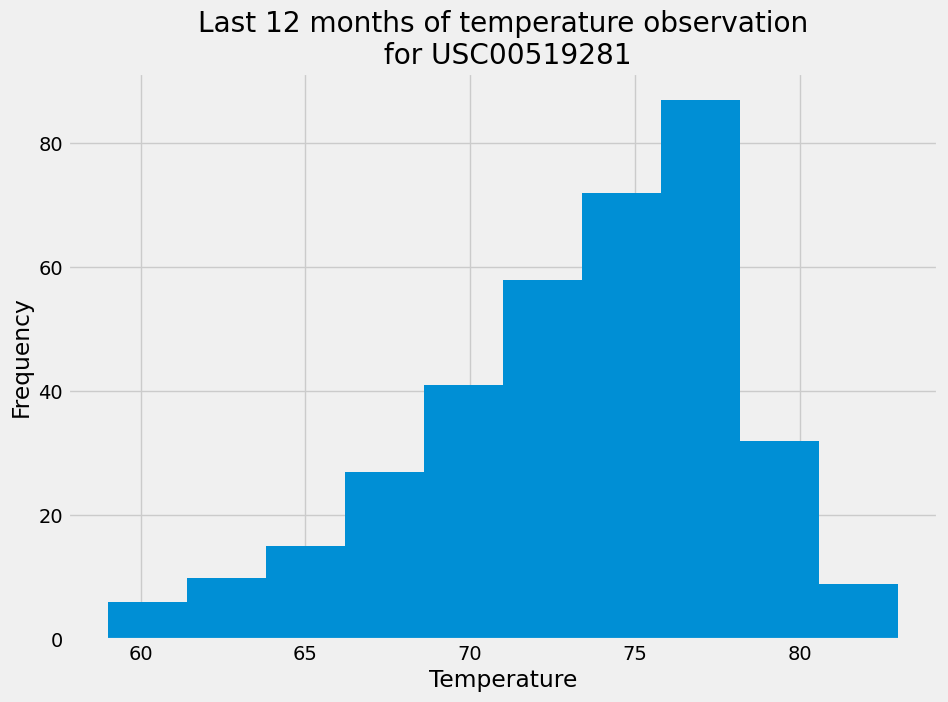

In [116]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_12_months_date = session.query(Measurements.date,Measurements.tobs).filter(Measurements.station==most_active_id).order_by(Measurements.date.desc()).first()
most_active_last_12_months_date.date
last_12_months = dt.date(2017,8,18) - dt.timedelta(days=365)
print(last_12_months)
result = session.query(Measurements.date,Measurements.tobs).filter(Measurements.station==most_active_id).filter(Measurements.date>=last_12_months)
df_1 = pd.DataFrame(result,columns=["12 months","Temp"])
df_1
plt.hist(df_1['Temp'])
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.title("Last 12 months of temperature observation\n for USC00519281")
plt.tight_layout   
plt.show()                                            

# Close Session

In [57]:
# Close Session
Session.close()

TypeError: Session.close() missing 1 required positional argument: 'self'